In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [2]:
# 시계열 자료 분석을 위한 DatetimeIndex 사용법

In [3]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   363k      0 --:--:-- --:--:-- --:--:--  371k


In [118]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0) # csv -> df
weather.head()
weather.index # datetimeIndex가 아님
weather.info()
weather['최대 풍속'].mean(), weather['평균 풍속'].mean()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균 기온   3653 non-null   float64
 1   최대 풍속   3649 non-null   float64
 2   평균 풍속   3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


(7.911098931214031, 3.9364409103372635)

In [91]:
# Note:
weather_1 = pd.read_csv("weather.csv", index_col = 0, parse_dates=True) # parse_dates=True : datetimeIndex임
weather_1.index
weather_1.head()
weather_1['year'] = weather_1.index.year # 'year' 열 추가
weather_1['month'] = weather_1.index.month # 'month' 열 추가
weather_1.head()

,평균 기온,최대 풍속,평균 풍속,year,month
일시,,,,,
2010-08-01,28.7,8.3,3.4,2010,8
2010-08-02,25.2,8.7,3.8,2010,8
2010-08-03,22.1,6.3,2.9,2010,8
2010-08-04,25.3,6.6,4.2,2010,8
2010-08-05,27.2,9.1,5.6,2010,8


In [92]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data)

#3) 결측 값을 평균 풍속으로 채움, inplace=True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean() # 3.9364409103372635
weather['평균 풍속'].fillna(mean_wind, inplace=True) # 평균 풍속 컬럼만 선택
print(weather.loc["2012-02-11"])

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN
평균 기온   -0.700000
최대 풍속         NaN
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7060\3785621702.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['평균 풍속'].fillna(mean_wind, inplace=True) # 평균 풍속 컬럼만 선택


In [93]:
#3) 최대 풍속의 결측 값 -> 최대 풍속의 평균 값으로 채움 (inplace=True)
mean_wind = weather['최대 풍속'].mean() # 7.911098931214031
weather['최대 풍속'].fillna(mean_wind, inplace=True) # 최대 풍속 컬럼만 선택
print(weather.loc["2012-02-11"])

평균 기온   -0.700000
최대 풍속    7.911099
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7060\4239234247.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['최대 풍속'].fillna(mean_wind, inplace=True) # 최대 풍속 컬럼만 선택


In [119]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
# 3.1 데이터프레임 평탄화
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [120]:
weather.reset_index(inplace=True) # rangeIndex : (0, 3653)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


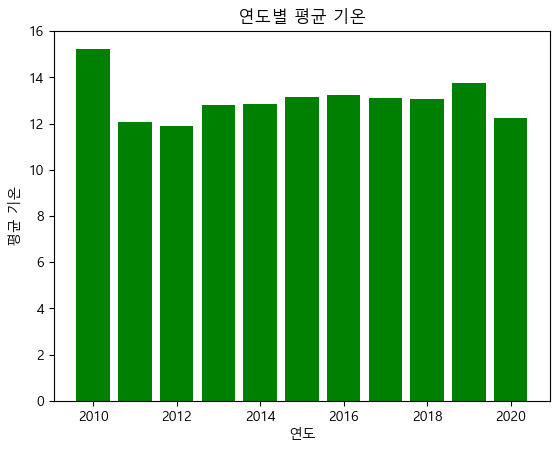

In [121]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
weather.head()
# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()

In [97]:
# 수치 데이터로 출력하시오
yearly_temp.max()
yearly_temp.idxmax()

2010

In [98]:
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year
0,2010-08-01,28.7,8.3,3.4,2010
1,2010-08-02,25.2,8.7,3.8,2010
2,2010-08-03,22.1,6.3,2.9,2010
3,2010-08-04,25.3,6.6,4.2,2010
4,2010-08-05,27.2,9.1,5.6,2010


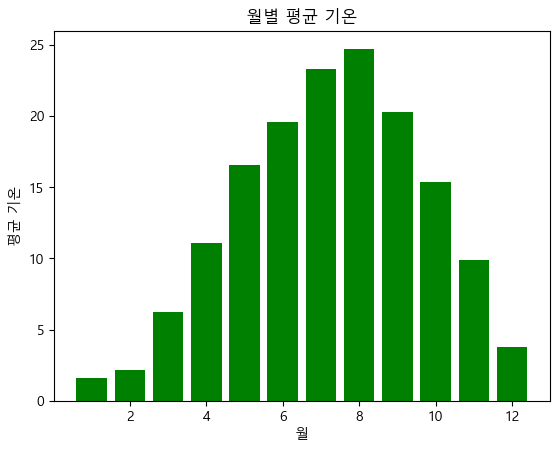

In [99]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [103]:
# 수치 데이터로 출력하시오
round(monthly_temp.max(), 1)
monthly_temp.idxmax()

8

Text(0, 0.5, '평균 풍속')

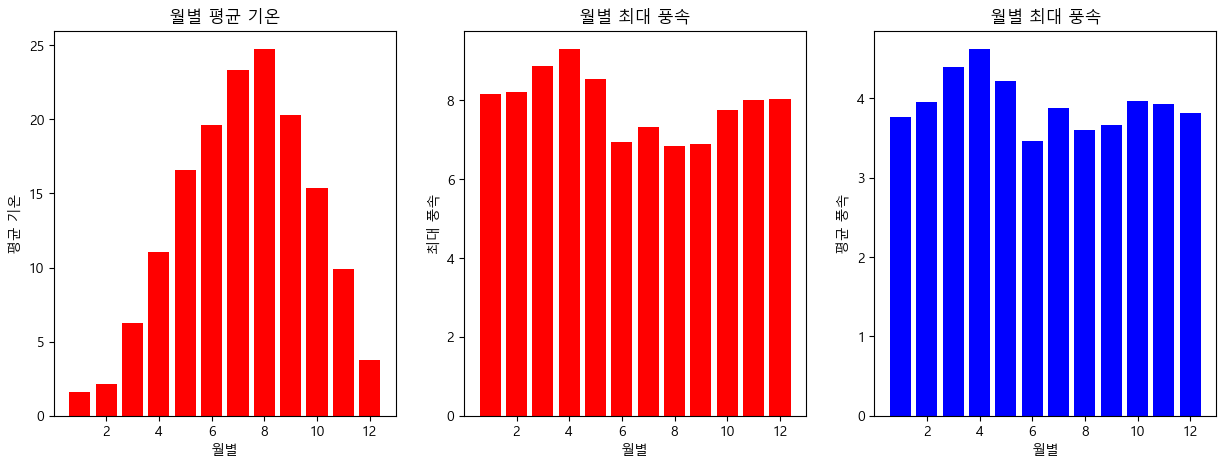

In [104]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 비교 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

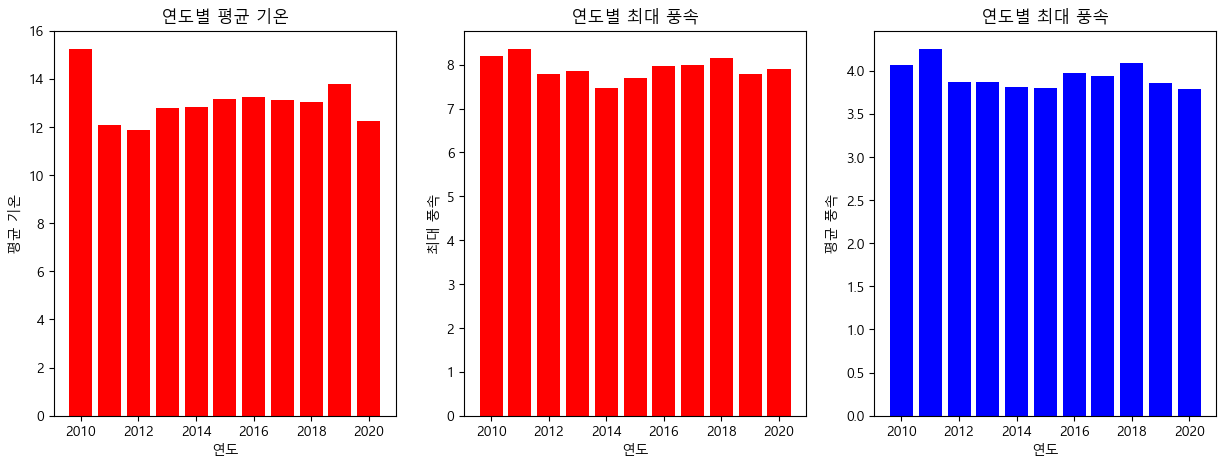

In [105]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 비교 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [ ]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [109]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.300370,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

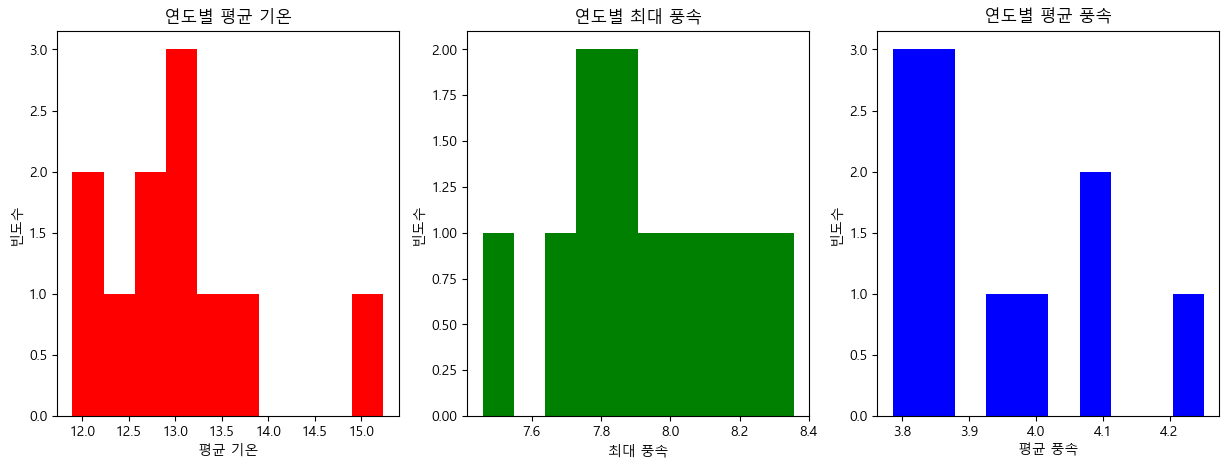

In [124]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.
# hist() : 데이터 포인트 배열을 받아, 값 범위를 여러 개의 구간으로 나누고, 각 구간에 속하는 데이터 포인트의 수만큼 막대를 그려 빈도를 표현함.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


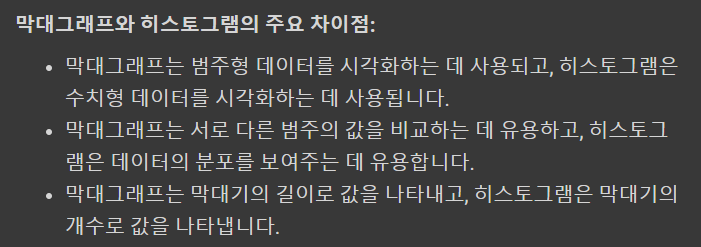

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.